In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
import scipy.stats as st

import os
import random

### Amostragem

Uma produtora deseja fazer um estudo sobre qualidade de queijos e, para isso, conduzir uma amostragem simples aleatória de 20 queijos de um lote de 100. Cada queijo recebeu uma identificação numérica. 

In [14]:
lista_queijos = list(range(1,101))
lista_queijos

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [ ]:
random_sample_queijos = random.sample(lista_queijos, k=20)
random_sample_queijos

[52, 62, 55, 24, 95, 74, 1, 13, 3, 48, 22, 5, 96, 54, 41, 43, 85, 87, 60, 75]

Um grupo de pesquisa deseja estudar nível de educação em algumas cidades do Brasil. Para isso, precisam selecionar da população original, 2 itens de cada uma das cidades consideradas no estudo para incluir na amostra. 

In [3]:
cidades = {"cidade": ["Belo Horizonte","Porto Alegre", "Rio de Janeiro", "Belem",
                      "Porto Alegre", "Porto Alegre","Vitoria", "Maceio","Belem",
                     "Belo Horizonte", "Maceio", "Vitoria", "Belem", "Rio de Janeiro","Belo Horizonte","Porto Alegre", "Belo Horizonte",
                     "Belo Horizonte", "Belem","Porto Alegre", "Vitoria", "Rio de Janeiro",
                      "Belo Horizonte", "Belem", "Maceio", "Vitoria"]}

In [16]:
cidades_df = pd.DataFrame(data=cidades)
cidades_df

,cidade
0,Belo Horizonte
1,Porto Alegre
2,Rio de Janeiro
3,Belem
4,Porto Alegre
5,Porto Alegre
6,Vitoria
7,Maceio
8,Belem
9,Belo Horizonte


In [17]:
cidades_df.groupby("cidade").apply(lambda x: x.sample(2, random_state=42))

cidade
cidade                           
Belem          8            Belem
               23           Belem
Belo Horizonte 0   Belo Horizonte
               9   Belo Horizonte
Maceio         7           Maceio
               10          Maceio
Porto Alegre   4     Porto Alegre
               19    Porto Alegre
Rio de Janeiro 2   Rio de Janeiro
               13  Rio de Janeiro
Vitoria        11         Vitoria
               25         Vitoria

In [ ]:
cidades_df.groupby("cidade", group_keys=False).apply(lambda x: x.sample(2, random_state=42)) 
# Assim some as chaves que representa cada uma das cidades no exemplo acima.

,cidade
8,Belem
23,Belem
0,Belo Horizonte
9,Belo Horizonte
7,Maceio
10,Maceio
4,Porto Alegre
19,Porto Alegre
2,Rio de Janeiro
13,Rio de Janeiro


### Teorema do Limite Central

In [29]:
pop = range(3000)
means = []

#montando distribuição amostral, n=40
for i in range(20):
    sample = random.sample(pop, k=40) #tira uma amostra de 40 elementos
    means.append(np.mean(sample)) #tira a média desta amostra e adiciona ao means

means

[1465.55,
 1493.2,
 1375.075,
 1351.45,
 1810.3,
 1465.5,
 1548.375,
 1622.525,
 1324.825,
 1509.925,
 1415.725,
 1214.225,
 1418.375,
 1401.725,
 1338.425,
 1286.825,
 1408.425,
 1428.4,
 1477.025,
 1694.625]

In [30]:
np.mean(means)

1452.525

In [31]:
np.mean(pop)

1499.5

### Distribuição Normal

In [36]:
data= np.array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72727273,
         2.92929293,   3.13131313,   3.33333333,   3.53535354,
         3.73737374,   3.93939394,   4.14141414,   4.34343434,
         4.54545455,   4.74747475,   4.94949495,   5.15151515,
         5.35353535,   5.55555556,   5.75757576,   5.95959596,
         6.16161616,   6.36363636,   6.56565657,   6.76767677,
         6.96969697,   7.17171717,   7.37373737,   7.57575758,
         7.77777778,   7.97979798,   8.18181818,   8.38383838,
         8.58585859,   8.78787879,   8.98989899,   9.19191919,
         9.39393939,   9.5959596 ,   9.7979798 ,  10.        ])

In [40]:
data=np.arange(-10,10,0.20202)

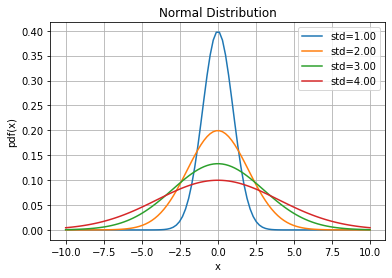

In [47]:
fig, ax = plt.subplots()

stds = [1.0, 2.0, 3.0, 4.0] #desvios padrões

for std in stds: #para cada desvio padrão, plotar um gráfico.
    ax.plot(data, norm.pdf(data,scale=std), label='std=%.2f' % std)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.grid(True)

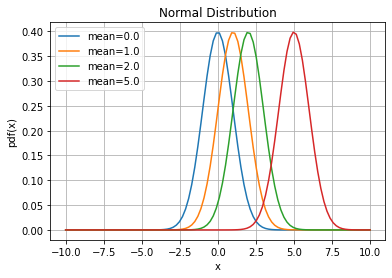

In [48]:
fig, ax = plt.subplots()

means = [0.0, 1.0, 2.0, 5.0] #médias
for mean in means: #para cada média plotar um gráfico
    ax.plot(data, norm.pdf(data,loc=mean), label='mean=%.1f' % mean)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.grid(True)

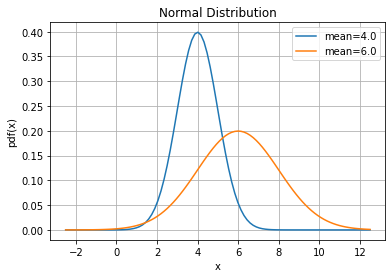

In [50]:
fig, ax = plt.subplots()

data = np.linspace(-2.5,12.5,100)

ax.plot(data, norm.pdf(data,loc=4.0, scale=1.0), label='mean=%.1f' % 4.0) #média 4 e desvio 1
ax.plot(data, norm.pdf(data,loc=6.0, scale=2.0), label='mean=%.1f' % 6.0) #média 6 e desvio 2

    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.grid(True)

In [51]:
data

array([-2.5       , -2.34848485, -2.1969697 , -2.04545455, -1.89393939,
       -1.74242424, -1.59090909, -1.43939394, -1.28787879, -1.13636364,
       -0.98484848, -0.83333333, -0.68181818, -0.53030303, -0.37878788,
       -0.22727273, -0.07575758,  0.07575758,  0.22727273,  0.37878788,
        0.53030303,  0.68181818,  0.83333333,  0.98484848,  1.13636364,
        1.28787879,  1.43939394,  1.59090909,  1.74242424,  1.89393939,
        2.04545455,  2.1969697 ,  2.34848485,  2.5       ,  2.65151515,
        2.8030303 ,  2.95454545,  3.10606061,  3.25757576,  3.40909091,
        3.56060606,  3.71212121,  3.86363636,  4.01515152,  4.16666667,
        4.31818182,  4.46969697,  4.62121212,  4.77272727,  4.92424242,
        5.07575758,  5.22727273,  5.37878788,  5.53030303,  5.68181818,
        5.83333333,  5.98484848,  6.13636364,  6.28787879,  6.43939394,
        6.59090909,  6.74242424,  6.89393939,  7.04545455,  7.1969697 ,
        7.34848485,  7.5       ,  7.65151515,  7.8030303 ,  7.95

Média de altura de uma população normalmente distribuída é 1.60 m, com desvio de 0.2m. Qual a probabilidade de selecionarmos uma pessoa aleatória e essa pessoa ser mais baixa que 1.40m?

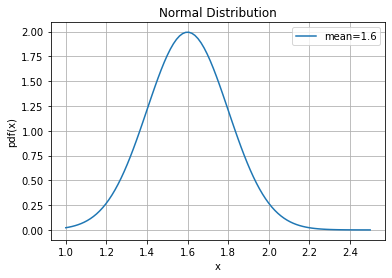

In [57]:
fig, ax = plt.subplots()

data = np.linspace(1.0, 2.5, 100)

ax.plot(data, norm.pdf(data,loc=1.6, scale=0.2), label='mean=%.1f' % 1.6)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.grid(True)

In [ ]:
norm(loc=1.60, scale=0.2).cdf(1.40) #calculando a área da curva de 1 a 1.4

0.15865525393145685

### Intervalo de Confiança

Peso de uma população, vamos criar um intervalo de confiança com nível de confiança 95% para o peso populacional médio.
Usar a distribuição t (n<30)

In [ ]:
sample = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]
# Usamos a distribuição t por conta do tamanho da amostra

teste_peso_95 = st.t.interval(alpha=0.95, df=len(sample)-1, loc=np.mean(sample), scale=st.sem(sample)) 

In [ ]:
teste_peso_95

(16.75776979778498, 24.042230202215016)

Usando nível de confiança de 99%

In [ ]:
teste_peso_99 = st.t.interval(alpha=0.99, df=len(sample)-1, loc=np.mean(sample), scale=st.sem(sample)) 

In [ ]:
teste_peso_99

(15.3447902793728, 25.455209720627195)

Usando teste z para distribuição normal ou quando temos n>=30.

In [62]:
np.random.seed(42)
sample_data = np.random.randint(10, 30, 50)

test_norm_95 = st.norm.interval(alpha=0.95, loc=np.mean(sample_data), scale=st.sem(sample_data))

In [63]:
sample_data

array([16, 29, 24, 20, 17, 16, 28, 20, 20, 13, 17, 12, 11, 21, 15, 11, 10,
       21, 21, 26, 19, 25, 24, 24, 28, 21, 29, 12, 14, 28, 16, 18, 16, 27,
       13, 23, 27, 18, 11, 29, 24, 16, 21, 17, 24, 12, 23, 26, 13, 27])

In [ ]:
test_norm_95

(18.25642372955045, 21.46357627044955)

### Teste de Hipotese

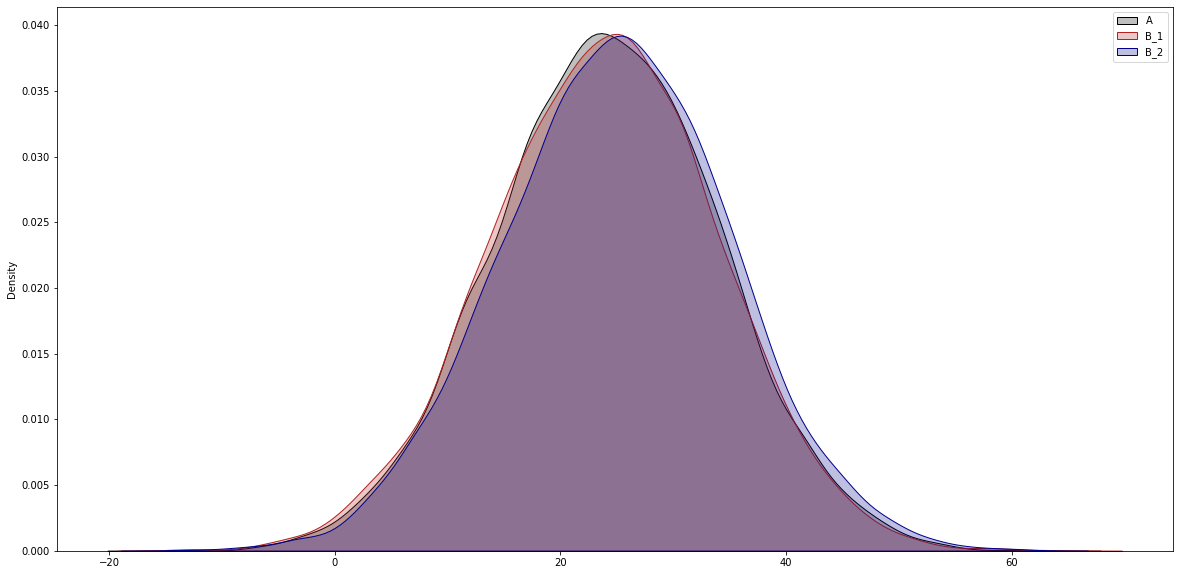

In [69]:
sample_a = np.random.normal(24, 10, 10000)
sample_b_1 = np.random.normal(24, 10, 10000)
sample_b_2 = np.random.normal(25, 10, 10000)
plt.figure(figsize=(20, 10))
sns.kdeplot(sample_a, label="A", shade = True, color = '#000000')
sns.kdeplot(sample_b_1, label="B_1", shade = True, color = '#B22222')
sns.kdeplot(sample_b_2, label="B_2", shade = True, color = '#00008B')
plt.legend()

In [70]:
import scipy.stats as stats
## H0: A = B
## H1: A != B
test_1 = stats.ttest_ind(sample_b_1,sample_a, equal_var = True)
test_2 = stats.ttest_ind(sample_b_2,sample_a, equal_var = True)
print(test_1)
print(test_2)

Ttest_indResult(statistic=-1.5989548083526217, pvalue=0.10984644224497686)
Ttest_indResult(statistic=5.662622067061534, pvalue=1.5112323062143697e-08)
